<a href="https://colab.research.google.com/github/emilia-uncc/IntroML/blob/main/Assignment2/Assignment2_3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
file_path = '/content/drive/My Drive/DataSets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [22]:
housing.shape

(545, 13)

In [23]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [24]:
# List of variables to map, yes/no variables to 0/1 variables

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#df_train = training set, #df_test = testset
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
####use other scaler also!!
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
#num_vars_with_y = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
#df_train[num_vars_with_y] = scaler.fit_transform(df_train[num_vars_with_y])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,7840000,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,6419000,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,5950000,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,3010000,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [27]:
y_train = df_train.pop('price') # price is the ground truth
X_train = df_train #X_train is the actual training set
X_train.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [28]:
#make the whole input values to an numpy array of dimension (381, 12)
#area, bedrooms, bathrooms, stories, parking
m_train=len(y_train) #381
X_0_train = np.ones((m_train, 1))
X_0_train[:5]



array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [29]:
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
area_train =  X_train.values[:, 0]  # get input values from first column -- X_train is a list here
bedrooms_train =  X_train.values[:, 1]  # get input values from second column -- X_train is a list here
bathrooms_train =  X_train.values[:, 2]  # get input values from third column -- X_train is a list here
stories_train =  X_train.values[:, 3]  # get input values from fourth column -- X_train is a list here
mainroad_train =  X_train.values[:, 4]  # get input values from fourth column -- X_train is a list here
guestroom_train =  X_train.values[:, 5]  # get input values from fourth column -- X_train is a list here
basement_train =  X_train.values[:, 6]  # get input values from fourth column -- X_train is a list here
hotwaterheating_train =  X_train.values[:, 7]  # get input values from fourth column -- X_train is a list here
airconditioning_train =  X_train.values[:, 8]  # get input values from fourth column -- X_train is a list here
parking_train =  X_train.values[:, 9]  # get input values from fifth column -- X_train is a list here
prefarea_train =  X_train.values[:, 10]  # get input values from fourth column -- X_train is a list here

In [30]:
#getting the whole inputmatrix (381, 6)
area_train = area_train.reshape(m_train, 1)
bedrooms_train = bedrooms_train.reshape(m_train, 1)
bathrooms_train = bathrooms_train.reshape(m_train, 1)
stories_train = stories_train.reshape(m_train, 1)
mainroad_train = mainroad_train.reshape(m_train, 1)
guestroom_train = guestroom_train.reshape(m_train, 1)
basement_train = basement_train.reshape(m_train,1)
hotwaterheating_train = hotwaterheating_train.reshape(m_train,1)
airconditioning_train = airconditioning_train.reshape(m_train,1)
parking_train = parking_train.reshape(m_train, 1)
prefarea_train = prefarea_train.reshape(m_train,1)
#putting it all in one matrix
input_matrix_train = np.hstack((X_0_train, area_train, bedrooms_train, bathrooms_train, stories_train,mainroad_train,guestroom_train,basement_train,hotwaterheating_train,airconditioning_train,  parking_train, prefarea_train))
input_matrix_train[:5]


array([[1.0, 0.4326093010303536, 0.4000000000000001, 0.0, 0.0, 1, 1, 1,
        0, 1, 0.3333333333333333, 0],
       [1.0, 0.31495405179615704, 0.4000000000000001, 0.3333333333333333,
        1.0, 1, 0, 0, 0, 1, 0.0, 1],
       [1.0, 0.34210526315789475, 0.2, 0.0, 0.0, 1, 1, 1, 0, 0,
        0.6666666666666666, 1],
       [1.0, 0.3191311612364244, 0.4000000000000001, 0.0, 0.0, 1, 0, 1,
        0, 1, 0.0, 1],
       [1.0, 0.12489557226399334, 0.6000000000000001, 0.0,
        0.3333333333333333, 1, 0, 0, 0, 0, 1.0, 0]], dtype=object)

In [31]:
#doing the same for testset
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
#df_test[num_vars_with_y] = scaler.fit_transform(df_test[num_vars_with_y])
df_test.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,7350000,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,5250000,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,4550000,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,4382000,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [32]:
y_test = df_test.pop('price') # price is the ground truth
X_test = df_test #X_train is the actual training set
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [33]:
#make the whole input values to an numpy array of dimension (164, 12)
#area, bedrooms, bathrooms, stories, parking
m_test=len(y_test) #164
X_0_test = np.ones((m_test, 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [34]:
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
area_test =  X_test.values[:, 0]  # get input values from first column -- X_train is a list here
bedrooms_test =  X_test.values[:, 1]  # get input values from second column -- X_train is a list here
bathrooms_test =  X_test.values[:, 2]  # get input values from third column -- X_train is a list here
stories_test =  X_test.values[:, 3]  # get input values from fourth column -- X_train is a list here
mainroad_test =  X_test.values[:, 4]  # get input values from fourth column -- X_train is a list here
guestroom_test =  X_test.values[:, 5]  # get input values from fourth column -- X_train is a list here
basement_test =  X_test.values[:, 6]  # get input values from fourth column -- X_train is a list here
hotwaterheating_test =  X_test.values[:, 7]  # get input values from fourth column -- X_train is a list here
airconditioning_test =  X_test.values[:, 8]  # get input values from fourth column -- X_train is a list here
parking_test =  X_test.values[:, 9]  # get input values from fifth column -- X_train is a list here
prefarea_test =  X_test.values[:, 10]  # get input values from fourth column -- X_train is a list here

In [35]:
#getting the whole inputmatrix (381, 6)
area_test = area_test.reshape(m_test, 1)
bedrooms_test = bedrooms_test.reshape(m_test, 1)
bathrooms_test = bathrooms_test.reshape(m_test, 1)
stories_test = stories_test.reshape(m_test, 1)
mainroad_test = mainroad_test.reshape(m_test, 1)
guestroom_test = guestroom_test.reshape(m_test, 1)
basement_test = basement_test.reshape(m_test,1)
hotwaterheating_test = hotwaterheating_test.reshape(m_test,1)
airconditioning_test = airconditioning_test.reshape(m_test,1)
parking_test = parking_test.reshape(m_test, 1)
prefarea_test = prefarea_test.reshape(m_test,1)
#putting it all in one matrix
input_matrix_test = np.hstack((X_0_test, area_test, bedrooms_test, bathrooms_test, stories_test,mainroad_test,guestroom_test,basement_test,hotwaterheating_test,airconditioning_test,  parking_test, prefarea_test))
input_matrix_test[:5]

array([[1.0, 0.08817204301075268, 0.33333333333333337, 0.0,
        0.3333333333333333, 1, 0, 0, 0, 0, 0.0, 1],
       [1.0, 0.3118279569892473, 0.33333333333333337, 0.5,
        0.3333333333333333, 1, 1, 0, 0, 1, 0.3333333333333333, 0],
       [1.0, 0.6178494623655914, 0.33333333333333337, 0.0, 0.0, 1, 0, 0,
        0, 0, 0.3333333333333333, 1],
       [1.0, 0.2630824372759857, 0.33333333333333337, 0.0,
        0.3333333333333333, 1, 1, 1, 0, 0, 0.0, 1],
       [1.0, 0.23655913978494625, 0.6666666666666666, 0.0,
        0.3333333333333333, 1, 0, 0, 0, 1, 0.0, 0]], dtype=object)

In [36]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
train_losses = []
val_losses = []

theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta = np.array(theta)
iterations = 2500
alpha = 0.1
lambda_reg = 5

for iteration in range(iterations):
    gradients = 1/m_train * input_matrix_train.T.dot(input_matrix_train.dot(theta) - y_train)
    # Exclude regularization for theta_0 (bias term)
    gradients[1:] += (lambda_reg/m_train) * theta[1:]

    theta = theta - (alpha * gradients)

    train_loss = (1/(2*m_train)) * (np.sum(np.square(input_matrix_train.dot(theta) - y_train)))
    val_loss = (1/(2*m_test)) * np.sum(np.square(input_matrix_test.dot(theta) - y_test))  # No regularization term here for validation loss

    train_losses.append(train_loss)
    val_losses.append(val_loss)


#theta, train_loss = gradient_descent(input_matrix_train, y_train, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', train_losses[:5])
print('cost_history =', val_losses[:5])

Final value of theta = [1959648.062903879 2328217.5375236734 669646.1427899643 2506271.818862703
 1227548.418618494 673754.9846347978 464765.006355094 300912.9779223185
 787880.9764878299 937566.599412261 905717.588673071 638310.0191627566]
cost_history = [7869147502488.627, 4855814005425.731, 3162913642528.1167, 2210149414081.314, 1672401936368.5947]
cost_history = [7337565382934.772, 4421135975545.822, 2801711417982.741, 1904671343251.078, 1409195591860.0015]


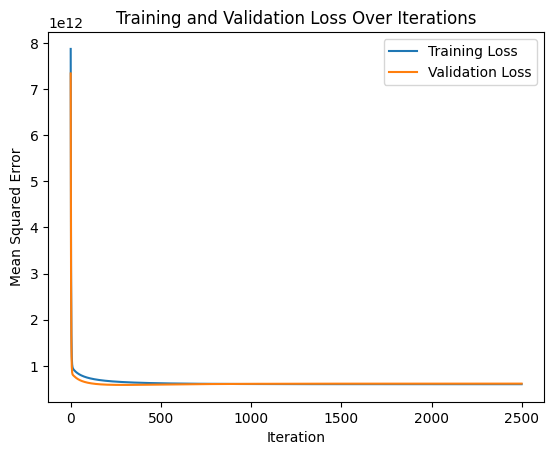

In [46]:
# 4. Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()